In [17]:
!pip install -q kora

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kora.data_table

In [22]:
df=pd.read_csv('/content/drive/MyDrive/Data_for_MyColab/2143488_Big Data and Artificial Intelligence/HW_W2_Data-20210131/HW2_Housing Survey.csv')
df

,RT,SERIALNO,DIVISION,PUMA,REGION,ST,ADJUST,WGTP,NP,TYPE,ACR,AGS,BDS,BLD,BUS,CONP,ELEP,FS,FULP,GASP,HFL,INSP,KIT,MHP,MRGI,MRGP,MRGT,MRGX,PLM,RMS,RNTM,RNTP,SMP,TEL,TEN,VACS,VAL,VEH,WATP,YBL,...,wgtp41,wgtp42,wgtp43,wgtp44,wgtp45,wgtp46,wgtp47,wgtp48,wgtp49,wgtp50,wgtp51,wgtp52,wgtp53,wgtp54,wgtp55,wgtp56,wgtp57,wgtp58,wgtp59,wgtp60,wgtp61,wgtp62,wgtp63,wgtp64,wgtp65,wgtp66,wgtp67,wgtp68,wgtp69,wgtp70,wgtp71,wgtp72,wgtp73,wgtp74,wgtp75,wgtp76,wgtp77,wgtp78,wgtp79,wgtp80
0,H,186,8,700,4,16,1015675,89,4,1,1.0,NaN,4.0,2.0,2.0,NaN,180.0,0.0,2.0,3.0,3.0,600.0,1.0,NaN,1.0,1300.0,1.0,1.0,1.0,9.0,NaN,NaN,NaN,1.0,1.0,NaN,17.0,3.0,840.0,5.0,...,90,171,27,83,153,148,92,91,91,93,90,26,94,142,24,91,29,84,148,30,93,143,24,88,147,145,91,83,83,86,81,27,93,151,28,79,25,101,157,129
1,H,306,8,700,4,16,1015675,310,1,1,NaN,NaN,1.0,7.0,NaN,NaN,60.0,0.0,2.0,3.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.0,600.0,NaN,1.0,3.0,NaN,NaN,1.0,1.0,3.0,...,107,253,321,289,96,343,564,274,118,118,321,261,130,463,294,479,391,307,476,283,116,353,323,374,106,236,380,313,90,94,292,401,81,494,346,496,615,286,454,260
2,H,395,8,100,4,16,1015675,106,2,1,1.0,NaN,3.0,2.0,2.0,NaN,70.0,0.0,2.0,30.0,1.0,200.0,1.0,NaN,NaN,NaN,NaN,3.0,1.0,7.0,NaN,NaN,NaN,1.0,2.0,NaN,18.0,2.0,50.0,5.0,...,173,36,168,175,99,103,30,35,155,102,95,107,185,120,114,113,36,115,103,29,183,35,179,169,95,110,28,34,233,97,123,119,168,107,95,101,30,124,106,31
3,H,506,8,700,4,16,1015675,240,4,1,1.0,NaN,4.0,2.0,2.0,NaN,40.0,0.0,2.0,80.0,1.0,200.0,1.0,NaN,1.0,860.0,1.0,1.0,1.0,6.0,NaN,NaN,400.0,1.0,1.0,NaN,19.0,3.0,500.0,2.0,...,239,65,259,247,230,225,82,220,233,419,390,69,74,391,276,70,422,409,223,245,269,488,221,250,247,240,415,234,219,66,68,359,385,71,234,421,76,77,242,231
4,H,835,8,800,4,16,1015675,118,4,1,2.0,1.0,5.0,2.0,2.0,NaN,250.0,0.0,2.0,3.0,3.0,700.0,1.0,NaN,1.0,1900.0,1.0,1.0,1.0,7.0,NaN,NaN,650.0,1.0,1.0,NaN,20.0,5.0,2.0,3.0,...,116,36,135,237,33,33,249,102,84,224,119,250,119,125,126,32,112,33,131,45,101,165,125,41,191,195,49,119,92,44,127,36,119,121,116,209,97,176,144,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,H,1357238,8,300,4,16,1015675,108,2,1,NaN,NaN,2.0,5.0,NaN,NaN,40.0,0.0,1.0,3.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,3.0,2.0,480.0,NaN,2.0,3.0,NaN,NaN,1.0,1.0,2.0,...,85,92,33,25,139,184,47,121,228,32,35,104,148,179,109,151,89,102,202,140,117,96,244,136,27,39,150,107,52,232,198,88,112,26,64,106,142,106,33,111
6492,H,1357340,8,400,4,16,1015675,58,2,1,1.0,NaN,3.0,2.0,2.0,NaN,30.0,0.0,2.0,70.0,1.0,260.0,1.0,NaN,NaN,NaN,NaN,3.0,1.0,6.0,NaN,NaN,NaN,1.0,2.0,NaN,16.0,1.0,400.0,3.0,...,113,66,52,97,45,84,51,48,69,13,48,15,71,51,16,82,79,13,18,21,15,67,55,19,53,14,51,66,71,100,66,101,62,52,105,75,20,127,105,68
6493,H,1357874,8,900,4,16,1015675,32,2,1,1.0,NaN,2.0,2.0,2.0,NaN,70.0,0.0,2.0,120.0,1.0,420.0,1.0,NaN,2.0,400.0,2.0,1.0,1.0,4.0,NaN,NaN,240.0,1.0,1.0,NaN,6.0,2.0,410.0,9.0,...,14,11,36,53,32,10,30,36,6,33,64,55,47,34,27,27,33,25,11,13,45,51,41,9,30,50,38,31,49,31,7,8,12,37,44,36,28,33,48,59
6494,H,1357880,8,500,4,16,1015675,123,2,1,2.0,1.0,1.0,2.0,2.0,NaN,140.0,0.0,2.0,3.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,3.0,2.0,600.0,NaN,2.0,3.0,NaN,NaN,5.0,1.0,9.0,...,35,115,42,38,123,43,233,115,113,114,193,120,36,144,212,226,122,118,245,127,33,134,33,35,129,38,206,127,116,112,201,123,38,104,186,203,132,118,201,125


## **How many properties are worth $1,000,000 or more?**

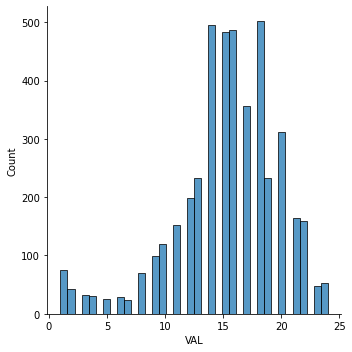

In [28]:
sns.displot(df,x='VAL')

In [103]:
df[df.VAL==24].shape

(53, 188)

In [30]:
prop_num=df[df.VAL==24].shape[0]
print(f'There are {prop_num} that are worth more than $1,000,000')

There are 53 that are worth more than $1,000,000


## **How many people recorded in a house on average?**

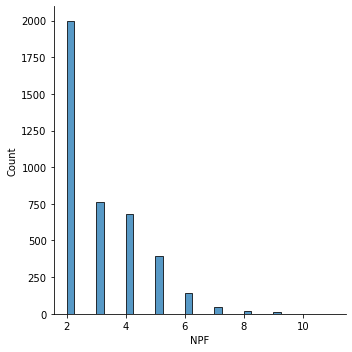

In [31]:
sns.displot(df,x='NPF')

In [33]:
npf_avg=df.NPF.mean()

In [34]:
print(f'The average number of persons in family is {npf_avg}')

The average number of persons in family is 3.0617131572451246


## **Draw a graph to show the relationship between the property value and the number of persons recorded?**

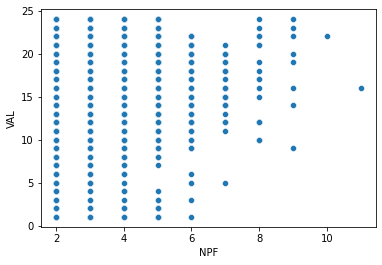

In [35]:
sns.scatterplot(x=df.NPF,y=df.VAL)

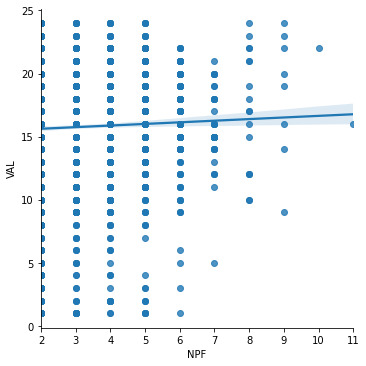

In [38]:
sns.lmplot(x='NPF',y='VAL',data=df)

## **Normalize family income into a range(0-1). Compare before vs after in histogram.**

In [53]:
df[df.FINCP.isnull()==True]

,RT,SERIALNO,DIVISION,PUMA,REGION,ST,ADJUST,WGTP,NP,TYPE,ACR,AGS,BDS,BLD,BUS,CONP,ELEP,FS,FULP,GASP,HFL,INSP,KIT,MHP,MRGI,MRGP,MRGT,MRGX,PLM,RMS,RNTM,RNTP,SMP,TEL,TEN,VACS,VAL,VEH,WATP,YBL,...,wgtp41,wgtp42,wgtp43,wgtp44,wgtp45,wgtp46,wgtp47,wgtp48,wgtp49,wgtp50,wgtp51,wgtp52,wgtp53,wgtp54,wgtp55,wgtp56,wgtp57,wgtp58,wgtp59,wgtp60,wgtp61,wgtp62,wgtp63,wgtp64,wgtp65,wgtp66,wgtp67,wgtp68,wgtp69,wgtp70,wgtp71,wgtp72,wgtp73,wgtp74,wgtp75,wgtp76,wgtp77,wgtp78,wgtp79,wgtp80
1,H,306,8,700,4,16,1015675,310,1,1,NaN,NaN,1.0,7.0,NaN,NaN,60.0,0.0,2.0,3.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.0,600.0,NaN,1.0,3.0,NaN,NaN,1.0,1.0,3.0,...,107,253,321,289,96,343,564,274,118,118,321,261,130,463,294,479,391,307,476,283,116,353,323,374,106,236,380,313,90,94,292,401,81,494,346,496,615,286,454,260
6,H,1861,8,700,4,16,1015675,0,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,H,2120,8,200,4,16,1015675,35,1,1,1.0,NaN,2.0,1.0,2.0,NaN,40.0,0.0,480.0,3.0,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,4.0,NaN,NaN,NaN,1.0,4.0,NaN,NaN,1.0,650.0,5.0,...,34,10,35,10,43,53,34,50,41,59,36,47,58,31,9,47,64,10,34,11,36,11,34,11,33,27,32,53,26,58,40,36,55,48,10,49,40,8,40,68
9,H,2428,8,500,4,16,1015675,51,2,1,1.0,NaN,2.0,1.0,2.0,NaN,20.0,0.0,2.0,140.0,1.0,120.0,1.0,220.0,NaN,NaN,NaN,3.0,1.0,5.0,NaN,NaN,NaN,1.0,2.0,NaN,1.0,2.0,2.0,5.0,...,18,48,63,65,51,17,47,48,76,69,13,14,85,72,16,91,110,51,45,48,63,55,57,39,60,112,66,46,18,18,89,83,11,49,82,15,10,49,57,69
13,H,3331,8,600,4,16,1015675,0,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6479,H,1355145,8,100,4,16,1015675,87,2,1,1.0,NaN,0.0,2.0,2.0,NaN,50.0,0.0,2.0,3.0,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,480.0,NaN,1.0,3.0,NaN,NaN,2.0,400.0,8.0,...,150,88,75,103,24,75,134,91,143,168,22,106,29,77,72,24,99,23,136,91,153,79,95,81,27,88,142,82,124,187,28,97,34,89,92,25,101,25,145,74
6483,H,1356038,8,900,4,16,1015675,77,0,1,1.0,NaN,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,2.0,...,113,103,20,89,113,24,30,81,66,141,69,73,104,83,132,85,79,27,22,87,20,24,136,80,23,107,150,92,68,20,98,84,74,74,20,85,90,109,115,68
6485,H,1356367,8,600,4,16,1015675,257,1,1,1.0,NaN,1.0,1.0,2.0,NaN,30.0,0.0,2.0,10.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,3.0,2.0,440.0,NaN,1.0,3.0,NaN,NaN,1.0,1.0,2.0,...,271,244,285,73,259,81,259,221,65,271,427,72,74,427,286,260,500,259,408,72,313,305,237,427,272,393,267,252,423,245,64,403,464,73,282,282,77,276,78,433
6487,H,1356517,8,200,4,16,1015675,0,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


There are too many row with NaN so we will drop them out and plot only the remain value

In [56]:
df_new=df[df.FINCP.isnull()==False]
df_new

,RT,SERIALNO,DIVISION,PUMA,REGION,ST,ADJUST,WGTP,NP,TYPE,ACR,AGS,BDS,BLD,BUS,CONP,ELEP,FS,FULP,GASP,HFL,INSP,KIT,MHP,MRGI,MRGP,MRGT,MRGX,PLM,RMS,RNTM,RNTP,SMP,TEL,TEN,VACS,VAL,VEH,WATP,YBL,...,wgtp41,wgtp42,wgtp43,wgtp44,wgtp45,wgtp46,wgtp47,wgtp48,wgtp49,wgtp50,wgtp51,wgtp52,wgtp53,wgtp54,wgtp55,wgtp56,wgtp57,wgtp58,wgtp59,wgtp60,wgtp61,wgtp62,wgtp63,wgtp64,wgtp65,wgtp66,wgtp67,wgtp68,wgtp69,wgtp70,wgtp71,wgtp72,wgtp73,wgtp74,wgtp75,wgtp76,wgtp77,wgtp78,wgtp79,wgtp80
0,H,186,8,700,4,16,1015675,89,4,1,1.0,NaN,4.0,2.0,2.0,NaN,180.0,0.0,2.0,3.0,3.0,600.0,1.0,NaN,1.0,1300.0,1.0,1.0,1.0,9.0,NaN,NaN,NaN,1.0,1.0,NaN,17.0,3.0,840.0,5.0,...,90,171,27,83,153,148,92,91,91,93,90,26,94,142,24,91,29,84,148,30,93,143,24,88,147,145,91,83,83,86,81,27,93,151,28,79,25,101,157,129
2,H,395,8,100,4,16,1015675,106,2,1,1.0,NaN,3.0,2.0,2.0,NaN,70.0,0.0,2.0,30.0,1.0,200.0,1.0,NaN,NaN,NaN,NaN,3.0,1.0,7.0,NaN,NaN,NaN,1.0,2.0,NaN,18.0,2.0,50.0,5.0,...,173,36,168,175,99,103,30,35,155,102,95,107,185,120,114,113,36,115,103,29,183,35,179,169,95,110,28,34,233,97,123,119,168,107,95,101,30,124,106,31
3,H,506,8,700,4,16,1015675,240,4,1,1.0,NaN,4.0,2.0,2.0,NaN,40.0,0.0,2.0,80.0,1.0,200.0,1.0,NaN,1.0,860.0,1.0,1.0,1.0,6.0,NaN,NaN,400.0,1.0,1.0,NaN,19.0,3.0,500.0,2.0,...,239,65,259,247,230,225,82,220,233,419,390,69,74,391,276,70,422,409,223,245,269,488,221,250,247,240,415,234,219,66,68,359,385,71,234,421,76,77,242,231
4,H,835,8,800,4,16,1015675,118,4,1,2.0,1.0,5.0,2.0,2.0,NaN,250.0,0.0,2.0,3.0,3.0,700.0,1.0,NaN,1.0,1900.0,1.0,1.0,1.0,7.0,NaN,NaN,650.0,1.0,1.0,NaN,20.0,5.0,2.0,3.0,...,116,36,135,237,33,33,249,102,84,224,119,250,119,125,126,32,112,33,131,45,101,165,125,41,191,195,49,119,92,44,127,36,119,121,116,209,97,176,144,38
5,H,989,8,700,4,16,1015675,115,4,1,1.0,NaN,3.0,2.0,2.0,NaN,130.0,0.0,2.0,3.0,3.0,250.0,1.0,NaN,1.0,700.0,1.0,1.0,1.0,6.0,NaN,NaN,400.0,1.0,1.0,NaN,15.0,2.0,1200.0,5.0,...,34,32,109,115,115,112,119,192,186,213,106,34,124,179,106,107,190,112,34,35,32,34,119,123,122,121,123,196,196,207,120,34,109,199,116,110,211,120,31,189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,H,1357238,8,300,4,16,1015675,108,2,1,NaN,NaN,2.0,5.0,NaN,NaN,40.0,0.0,1.0,3.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,3.0,2.0,480.0,NaN,2.0,3.0,NaN,NaN,1.0,1.0,2.0,...,85,92,33,25,139,184,47,121,228,32,35,104,148,179,109,151,89,102,202,140,117,96,244,136,27,39,150,107,52,232,198,88,112,26,64,106,142,106,33,111
6492,H,1357340,8,400,4,16,1015675,58,2,1,1.0,NaN,3.0,2.0,2.0,NaN,30.0,0.0,2.0,70.0,1.0,260.0,1.0,NaN,NaN,NaN,NaN,3.0,1.0,6.0,NaN,NaN,NaN,1.0,2.0,NaN,16.0,1.0,400.0,3.0,...,113,66,52,97,45,84,51,48,69,13,48,15,71,51,16,82,79,13,18,21,15,67,55,19,53,14,51,66,71,100,66,101,62,52,105,75,20,127,105,68
6493,H,1357874,8,900,4,16,1015675,32,2,1,1.0,NaN,2.0,2.0,2.0,NaN,70.0,0.0,2.0,120.0,1.0,420.0,1.0,NaN,2.0,400.0,2.0,1.0,1.0,4.0,NaN,NaN,240.0,1.0,1.0,NaN,6.0,2.0,410.0,9.0,...,14,11,36,53,32,10,30,36,6,33,64,55,47,34,27,27,33,25,11,13,45,51,41,9,30,50,38,31,49,31,7,8,12,37,44,36,28,33,48,59
6494,H,1357880,8,500,4,16,1015675,123,2,1,2.0,1.0,1.0,2.0,2.0,NaN,140.0,0.0,2.0,3.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,3.0,2.0,600.0,NaN,2.0,3.0,NaN,NaN,5.0,1.0,9.0,...,35,115,42,38,123,43,233,115,113,114,193,120,36,144,212,226,122,118,245,127,33,134,33,35,129,38,206,127,116,112,201,123,38,104,186,203,132,118,201,125


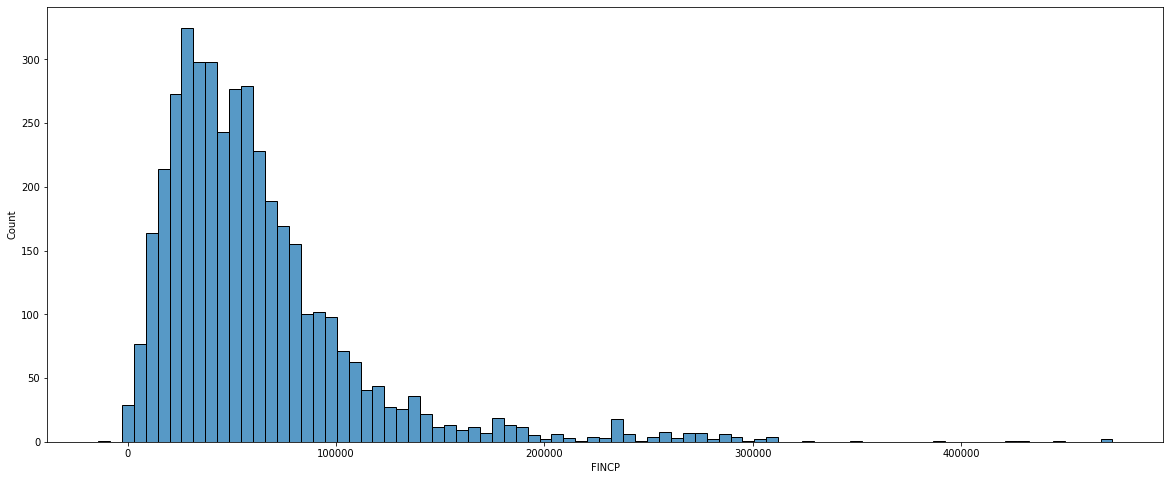

In [57]:
#before normalization
fig=plt.figure(figsize=(20,8))
sns.histplot(data=df_new,x='FINCP')

In [58]:
from sklearn import preprocessing
import numpy as np
x_array = np.array(df_new.FINCP)
normalized_arr = preprocessing.normalize([x_array])
print(normalized_arr)

[[0.02120216 0.00188731 0.01325135 ... 0.003614   0.00662567 0.00654536]]


In [61]:
df_new['FINCP_norm']=normalized_arr[0]
df_new

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,RT,SERIALNO,DIVISION,PUMA,REGION,ST,ADJUST,WGTP,NP,TYPE,ACR,AGS,BDS,BLD,BUS,CONP,ELEP,FS,FULP,GASP,HFL,INSP,KIT,MHP,MRGI,MRGP,MRGT,MRGX,PLM,RMS,RNTM,RNTP,SMP,TEL,TEN,VACS,VAL,VEH,WATP,YBL,...,wgtp42,wgtp43,wgtp44,wgtp45,wgtp46,wgtp47,wgtp48,wgtp49,wgtp50,wgtp51,wgtp52,wgtp53,wgtp54,wgtp55,wgtp56,wgtp57,wgtp58,wgtp59,wgtp60,wgtp61,wgtp62,wgtp63,wgtp64,wgtp65,wgtp66,wgtp67,wgtp68,wgtp69,wgtp70,wgtp71,wgtp72,wgtp73,wgtp74,wgtp75,wgtp76,wgtp77,wgtp78,wgtp79,wgtp80,FINCP_norm
0,H,186,8,700,4,16,1015675,89,4,1,1.0,NaN,4.0,2.0,2.0,NaN,180.0,0.0,2.0,3.0,3.0,600.0,1.0,NaN,1.0,1300.0,1.0,1.0,1.0,9.0,NaN,NaN,NaN,1.0,1.0,NaN,17.0,3.0,840.0,5.0,...,171,27,83,153,148,92,91,91,93,90,26,94,142,24,91,29,84,148,30,93,143,24,88,147,145,91,83,83,86,81,27,93,151,28,79,25,101,157,129,0.021202
2,H,395,8,100,4,16,1015675,106,2,1,1.0,NaN,3.0,2.0,2.0,NaN,70.0,0.0,2.0,30.0,1.0,200.0,1.0,NaN,NaN,NaN,NaN,3.0,1.0,7.0,NaN,NaN,NaN,1.0,2.0,NaN,18.0,2.0,50.0,5.0,...,36,168,175,99,103,30,35,155,102,95,107,185,120,114,113,36,115,103,29,183,35,179,169,95,110,28,34,233,97,123,119,168,107,95,101,30,124,106,31,0.001887
3,H,506,8,700,4,16,1015675,240,4,1,1.0,NaN,4.0,2.0,2.0,NaN,40.0,0.0,2.0,80.0,1.0,200.0,1.0,NaN,1.0,860.0,1.0,1.0,1.0,6.0,NaN,NaN,400.0,1.0,1.0,NaN,19.0,3.0,500.0,2.0,...,65,259,247,230,225,82,220,233,419,390,69,74,391,276,70,422,409,223,245,269,488,221,250,247,240,415,234,219,66,68,359,385,71,234,421,76,77,242,231,0.013251
4,H,835,8,800,4,16,1015675,118,4,1,2.0,1.0,5.0,2.0,2.0,NaN,250.0,0.0,2.0,3.0,3.0,700.0,1.0,NaN,1.0,1900.0,1.0,1.0,1.0,7.0,NaN,NaN,650.0,1.0,1.0,NaN,20.0,5.0,2.0,3.0,...,36,135,237,33,33,249,102,84,224,119,250,119,125,126,32,112,33,131,45,101,165,125,41,191,195,49,119,92,44,127,36,119,121,116,209,97,176,144,38,0.018672
5,H,989,8,700,4,16,1015675,115,4,1,1.0,NaN,3.0,2.0,2.0,NaN,130.0,0.0,2.0,3.0,3.0,250.0,1.0,NaN,1.0,700.0,1.0,1.0,1.0,6.0,NaN,NaN,400.0,1.0,1.0,NaN,15.0,2.0,1200.0,5.0,...,32,109,115,115,112,119,192,186,213,106,34,124,179,106,107,190,112,34,35,32,34,119,123,122,121,123,196,196,207,120,34,109,199,116,110,211,120,31,189,0.012247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,H,1357238,8,300,4,16,1015675,108,2,1,NaN,NaN,2.0,5.0,NaN,NaN,40.0,0.0,1.0,3.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,3.0,2.0,480.0,NaN,2.0,3.0,NaN,NaN,1.0,1.0,2.0,...,92,33,25,139,184,47,121,228,32,35,104,148,179,109,151,89,102,202,140,117,96,244,136,27,39,150,107,52,232,198,88,112,26,64,106,142,106,33,111,-0.000522
6492,H,1357340,8,400,4,16,1015675,58,2,1,1.0,NaN,3.0,2.0,2.0,NaN,30.0,0.0,2.0,70.0,1.0,260.0,1.0,NaN,NaN,NaN,NaN,3.0,1.0,6.0,NaN,NaN,NaN,1.0,2.0,NaN,16.0,1.0,400.0,3.0,...,66,52,97,45,84,51,48,69,13,48,15,71,51,16,82,79,13,18,21,15,67,55,19,53,14,51,66,71,100,66,101,62,52,105,75,20,127,105,68,0.010681
6493,H,1357874,8,900,4,16,1015675,32,2,1,1.0,NaN,2.0,2.0,2.0,NaN,70.0,0.0,2.0,120.0,1.0,420.0,1.0,NaN,2.0,400.0,2.0,1.0,1.0,4.0,NaN,NaN,240.0,1.0,1.0,NaN,6.0,2.0,410.0,9.0,...,11,36,53,32,10,30,36,6,33,64,55,47,34,27,27,33,25,11,13,45,51,41,9,30,50,38,31,49,31,7,8,12,37,44,36,28,33,48,59,0.003614
6494,H,1357880,8,500,4,16,1015675,123,2,1,2.0,1.0,1.0,2.0,2.0,NaN,140.0,0.0,2.0,3.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,3.0,2.0,600.0,NaN,2.0,3.0,NaN,NaN,5.0,1.0,9.0,...,115,42,38,123,43,233,115,113,114,193,120,36,144,212,226,122,118,245,127,33,134,33,35,129,38,206,127,116,112,201,123,38,104,186,203,132,118,201,125,0.006626


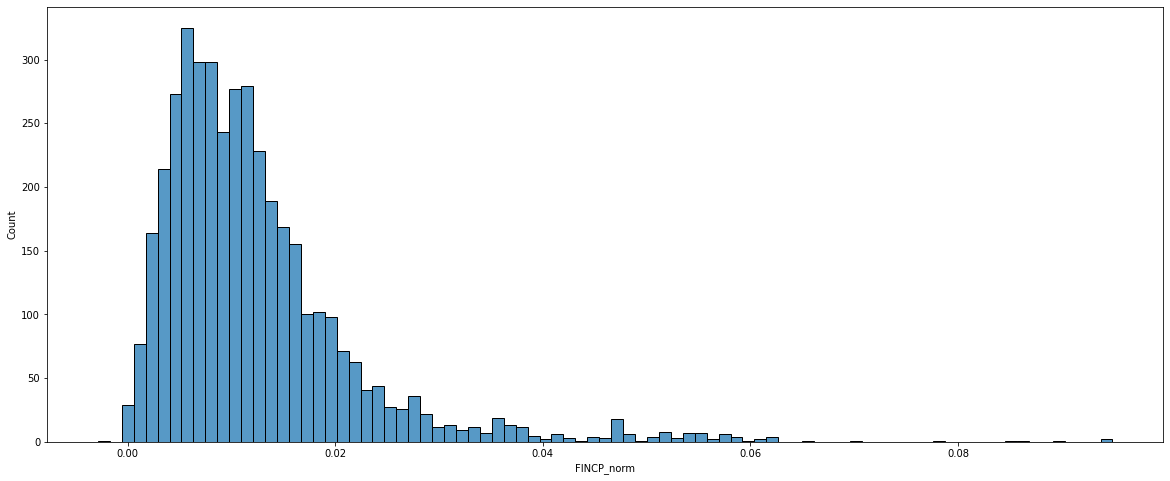

In [62]:
#after normalization
fig=plt.figure(figsize=(20,8))
sns.histplot(data=df_new,x='FINCP_norm')

## **Create 5 bins for family inform**

In [63]:
from sklearn import datasets, linear_model, metrics  

In [65]:
fincp_arr=np.array(df_new['FINCP_norm'])
fincp_arr

array([0.02120216, 0.00188731, 0.01325135, ..., 0.003614  , 0.00662567,
       0.00654536])

In [66]:
fincp_arr=np.sort(fincp_arr)
fincp_arr

array([-0.00287092, -0.00052202,  0.        , ...,  0.08994854,
        0.09436565,  0.09488768])

In [67]:
len(fincp_arr)

4051

In [73]:
bin1=fincp_arr[0:810]
bin2=fincp_arr[810:1620]
bin3=fincp_arr[1620:2430]
bin4=fincp_arr[2430:3240]
bin5=fincp_arr[3240:]
print(len(bin1),len(bin2),len(bin3),len(bin4),len(bin5))

810 810 810 810 811


In [74]:
bin1_max=bin1.max()
bin1_min=bin1.min()
bin1_mean=bin1.mean()
print(bin1_max,bin1_min,bin1_mean)

0.0053406944439337144 -0.0028709244305942924 0.0034112276596609432


In [75]:
bin2_max=bin2.max()
bin2_min=bin2.min()
bin2_mean=bin2.mean()
print(bin2_max,bin2_min,bin2_mean)

0.00833228644448305 0.0053406944439337144 0.006880186426695153


In [76]:
bin3_max=bin3.max()
bin3_min=bin3.min()
bin3_mean=bin3.mean()
print(bin3_max,bin3_min,bin3_mean)

0.012026601398181559 0.00833228644448305 0.010169963234379202


In [77]:
bin4_max=bin4.max()
bin4_min=bin4.min()
bin4_mean=bin4.mean()
print(bin4_max,bin4_min,bin4_mean)

0.016965739868887175 0.012040655857244544 0.014133351426523675


In [78]:
bin5_max=bin5.max()
bin5_min=bin5.min()
bin5_mean=bin5.mean()
print(bin5_max,bin5_min,bin5_mean)

0.09488767647379975 0.016965739868887175 0.02693711714182503


In [100]:
df_new['bin']=np.arange(0,4051)
df_new['FINCP_mean']=np.arange(0,4051).astype('float32')
for i in df_new.index:
  if (df_new.at[i,'FINCP_norm']<=bin1_max) and (df_new.at[i,'FINCP_norm']>=bin1_min):
    df_new.at[i,'bin']=1
    df_new.at[i,'FINCP_mean']=bin1_mean
  elif (df_new.at[i,'FINCP_norm']<=bin2_max) and (df_new.at[i,'FINCP_norm']>=bin2_min):
    df_new.at[i,'bin']=2
    df_new.at[i,'FINCP_mean']=bin2_mean
  elif (df_new.at[i,'FINCP_norm']<=bin3_max) and (df_new.at[i,'FINCP_norm']>=bin3_min):
    df_new.at[i,'bin']=3
    df_new.at[i,'FINCP_mean']=bin3_mean
  elif (df_new.at[i,'FINCP_norm']<=bin4_max) and (df_new.at[i,'FINCP_norm']>=bin4_min):
    df_new.at[i,'bin']=4
    df_new.at[i,'FINCP_mean']=bin4_mean
  else:
    df_new.at[i,'bin']=5
    df_new.at[i,'FINCP_mean']=bin5_mean
df_new

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,RT,SERIALNO,DIVISION,PUMA,REGION,ST,ADJUST,WGTP,NP,TYPE,ACR,AGS,BDS,BLD,BUS,CONP,ELEP,FS,FULP,GASP,HFL,INSP,KIT,MHP,MRGI,MRGP,MRGT,MRGX,PLM,RMS,RNTM,RNTP,SMP,TEL,TEN,VACS,VAL,VEH,WATP,YBL,...,wgtp44,wgtp45,wgtp46,wgtp47,wgtp48,wgtp49,wgtp50,wgtp51,wgtp52,wgtp53,wgtp54,wgtp55,wgtp56,wgtp57,wgtp58,wgtp59,wgtp60,wgtp61,wgtp62,wgtp63,wgtp64,wgtp65,wgtp66,wgtp67,wgtp68,wgtp69,wgtp70,wgtp71,wgtp72,wgtp73,wgtp74,wgtp75,wgtp76,wgtp77,wgtp78,wgtp79,wgtp80,FINCP_norm,bin,FINCP_mean
0,H,186,8,700,4,16,1015675,89,4,1,1.0,NaN,4.0,2.0,2.0,NaN,180.0,0.0,2.0,3.0,3.0,600.0,1.0,NaN,1.0,1300.0,1.0,1.0,1.0,9.0,NaN,NaN,NaN,1.0,1.0,NaN,17.0,3.0,840.0,5.0,...,83,153,148,92,91,91,93,90,26,94,142,24,91,29,84,148,30,93,143,24,88,147,145,91,83,83,86,81,27,93,151,28,79,25,101,157,129,0.021202,5,0.026937
2,H,395,8,100,4,16,1015675,106,2,1,1.0,NaN,3.0,2.0,2.0,NaN,70.0,0.0,2.0,30.0,1.0,200.0,1.0,NaN,NaN,NaN,NaN,3.0,1.0,7.0,NaN,NaN,NaN,1.0,2.0,NaN,18.0,2.0,50.0,5.0,...,175,99,103,30,35,155,102,95,107,185,120,114,113,36,115,103,29,183,35,179,169,95,110,28,34,233,97,123,119,168,107,95,101,30,124,106,31,0.001887,1,0.003411
3,H,506,8,700,4,16,1015675,240,4,1,1.0,NaN,4.0,2.0,2.0,NaN,40.0,0.0,2.0,80.0,1.0,200.0,1.0,NaN,1.0,860.0,1.0,1.0,1.0,6.0,NaN,NaN,400.0,1.0,1.0,NaN,19.0,3.0,500.0,2.0,...,247,230,225,82,220,233,419,390,69,74,391,276,70,422,409,223,245,269,488,221,250,247,240,415,234,219,66,68,359,385,71,234,421,76,77,242,231,0.013251,4,0.014133
4,H,835,8,800,4,16,1015675,118,4,1,2.0,1.0,5.0,2.0,2.0,NaN,250.0,0.0,2.0,3.0,3.0,700.0,1.0,NaN,1.0,1900.0,1.0,1.0,1.0,7.0,NaN,NaN,650.0,1.0,1.0,NaN,20.0,5.0,2.0,3.0,...,237,33,33,249,102,84,224,119,250,119,125,126,32,112,33,131,45,101,165,125,41,191,195,49,119,92,44,127,36,119,121,116,209,97,176,144,38,0.018672,5,0.026937
5,H,989,8,700,4,16,1015675,115,4,1,1.0,NaN,3.0,2.0,2.0,NaN,130.0,0.0,2.0,3.0,3.0,250.0,1.0,NaN,1.0,700.0,1.0,1.0,1.0,6.0,NaN,NaN,400.0,1.0,1.0,NaN,15.0,2.0,1200.0,5.0,...,115,115,112,119,192,186,213,106,34,124,179,106,107,190,112,34,35,32,34,119,123,122,121,123,196,196,207,120,34,109,199,116,110,211,120,31,189,0.012247,4,0.014133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,H,1357238,8,300,4,16,1015675,108,2,1,NaN,NaN,2.0,5.0,NaN,NaN,40.0,0.0,1.0,3.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,3.0,2.0,480.0,NaN,2.0,3.0,NaN,NaN,1.0,1.0,2.0,...,25,139,184,47,121,228,32,35,104,148,179,109,151,89,102,202,140,117,96,244,136,27,39,150,107,52,232,198,88,112,26,64,106,142,106,33,111,-0.000522,1,0.003411
6492,H,1357340,8,400,4,16,1015675,58,2,1,1.0,NaN,3.0,2.0,2.0,NaN,30.0,0.0,2.0,70.0,1.0,260.0,1.0,NaN,NaN,NaN,NaN,3.0,1.0,6.0,NaN,NaN,NaN,1.0,2.0,NaN,16.0,1.0,400.0,3.0,...,97,45,84,51,48,69,13,48,15,71,51,16,82,79,13,18,21,15,67,55,19,53,14,51,66,71,100,66,101,62,52,105,75,20,127,105,68,0.010681,3,0.010170
6493,H,1357874,8,900,4,16,1015675,32,2,1,1.0,NaN,2.0,2.0,2.0,NaN,70.0,0.0,2.0,120.0,1.0,420.0,1.0,NaN,2.0,400.0,2.0,1.0,1.0,4.0,NaN,NaN,240.0,1.0,1.0,NaN,6.0,2.0,410.0,9.0,...,53,32,10,30,36,6,33,64,55,47,34,27,27,33,25,11,13,45,51,41,9,30,50,38,31,49,31,7,8,12,37,44,36,28,33,48,59,0.003614,1,0.003411
6494,H,1357880,8,500,4,16,1015675,123,2,1,2.0,1.0,1.0,2.0,2.0,NaN,140.0,0.0,2.0,3.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,3.0,2.0,600.0,NaN,2.0,3.0,NaN,NaN,5.0,1.0,9.0,...,38,123,43,233,115,113,114,193,120,36,144,212,226,122,118,245,127,33,134,33,35,129,38,206,127,116,112,201,123,38,104,186,203,132,118,201,125,0.006626,2,0.006880


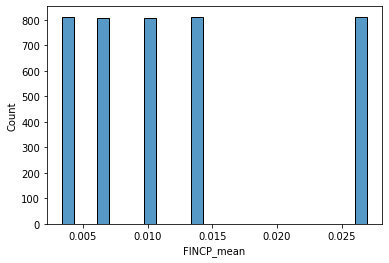

In [102]:
sns.histplot(data=df_new,x='FINCP_mean')